# Logistic Regression
## Introduction
Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the probability that a given input belongs to a particular class using a logistic function (also known as the sigmoid function). The logistic function maps any real-valued number into a value between 0 and 1, which can be interpreted as the probability of the positive class. The model is trained by finding the optimal weights that minimize the difference between predicted probabilities and actual outcomes, typically using methods like gradient descent. Despite its simplicity, logistic regression is widely used for tasks such as spam detection, medical diagnoses, and credit scoring.


## Explanation of the Algorithm in Python
### Import the libraries
Import the necessary libraries like numpy, pandas, and matplotlib.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Dataset
The dataset contains the features `Age` and `Purchased` (indicating if a purchase was made).

In [12]:
# Load the dataset
data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\logistic_reg_dataset.csv")  
x = data['Age'].values  # Feature: Age
y = data['Purchased'].values  # Target: Purchased (0 or 1)
x = x.reshape(-1, 1)  # Reshape x to be a column vector for matrix operations
X = np.c_[np.ones(x.shape[0]), x]  # Add an intercept column of ones to X

### Sigmoid Function
The sigmoid function converts the output of the linear model into a probability between 0 and 1.

In [13]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Logistic Regression Training Function
We use gradient descent to minimize the error in our logistic regression model. The function `logistic_regression` updates the weights iteratively.


In [14]:
# Define logistic regression function
def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])  # Initialize weights with zeros
    m = len(y)  # Number of samples
    for i in range(iterations):
        z = np.dot(X, weights)  # Linear combination
        h = sigmoid(z)  # Apply sigmoid to get probabilities
        gradient = np.dot(X.T, (h - y)) / m  # Compute gradient
        weights -= learning_rate * gradient  # Update weights
    return weights

# Set parameters
learning_rate = 0.01
iterations = 10000

# Train the logistic regression model
weights = logistic_regression(X, y, learning_rate, iterations)
print("Weights:", weights)


Weights: [-6.09325938  0.21891418]


### Predicting Purchase Probability
The `predict_purchase` function uses the trained model to predict the probability of a purchase for a given age and classifies the result as `Purchased` or `Not Purchased`.


In [15]:
# Prediction function
def predict_purchase(age):
    z = weights[0] + weights[1] * age
    probability = sigmoid(z)
    return probability, 1 if probability >= 0.5 else 0

# User input for age
user_age = 32
probability, purchase_prediction = predict_purchase(user_age)

# Display prediction result
print(f"Predicted probability of purchase: {probability:.2f}")
if purchase_prediction == 1:
    print("The model predicts that this person has purchased.")
else:
    print("The model predicts that this person has not purchased.")


Predicted probability of purchase: 0.71
The model predicts that this person has purchased.


### Plotting the Logistic Regression Fit
We visualize the logistic regression fit with the data points and the user input highlighted.


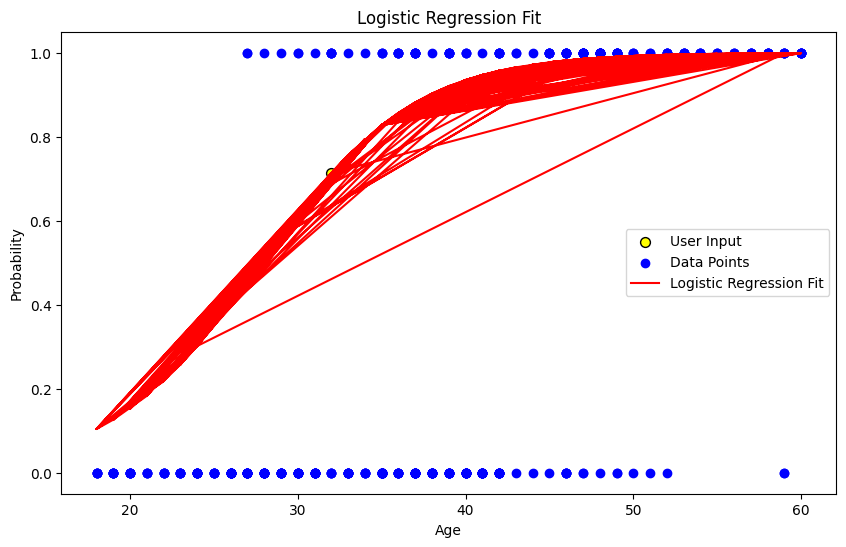

In [20]:
# Plot the logistic regression fit
plt.figure(figsize=(10, 6))
plt.scatter(user_age, probability, color='yellow', edgecolor='black', s=50, label='User Input')
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, sigmoid(np.dot(X, weights)), color='red', label='Logistic Regression Fit')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Logistic Regression Fit')
plt.legend()
plt.show()
